# Low Lou plot (metric)

In [ ]:
import os
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def create_metric_from_output(df, usetex=False):
    iters = np.array(df['iteration'])
    C_vec = np.array(df['C_vec'])
    C_cs = np.array(df['C_cs'])
    En_1 = np.array(df['1-En'])
    Em_1 = np.array(df['1-Em'])
    eps = np.array(df['eps'])
    eps_p = np.array(df['eps_p'])
    sig_J = np.array(df['sig_J'])
    L1 = np.array(df['L1'])
    L2 = np.array(df['L2'])
    curlB = np.array(df['curlB'])

    if usetex:
        metrics = {r'$C_{\text{vec}}$':C_vec,
                r'$C_{\text{CS}}$':C_cs,
                r'$E^{\prime}_{n}$':En_1,
                r'$E^{\prime}_{m}$':Em_1,
                r'$\epsilon$':eps,
                r'$\epsilon_p$':eps_p,
                r'$CW_{\text{sin}}$':sig_J,
                r'$L_1$':L1,
                r'$L_2$':L2,
                r'$|J_B|/|J_b|$':curlB}
    else:
        metrics = {r'$C_{vec}$':C_vec,
                r'$C_{CS}$':C_cs,
                r'$E^{\prime}_{n}$':En_1,
                r'$E^{\prime}_{m}$':Em_1,
                r'$\epsilon$':eps,
                r'$\epsilon_p$':eps_p,
                r'$CW_{sin}$':sig_J,
                r'$L_1$':L1,
                r'$L_2$':L2,
                r'$J_B$ / $J_b$':curlB}
    
    return iters, metrics

In [ ]:
def plot_metric(iters, metrics, img_path=None, which_log=None):
    if img_path is not None:
        os.makedirs(img_path, exist_ok=True)
    mets_pinn, mets_spinn = metrics
    for  (label, metric), (label2, metric2) in zip(mets_pinn.items(), mets_spinn.items()):
        fig, ax = plt.subplots(figsize=(8,6))
        
        aaa = [eval(i) for i in iters[2:]]

        if not (np.isnan(metric[0]) and np.isnan(metric[1])):
            ax.hlines(metric[0], xmin=aaa[0], xmax=aaa[-1], color='red', label='LL')
            if not (label in [r'$CW_{\text{sin}}$']):
                ax.hlines(metric[1], xmin=aaa[0], xmax=aaa[-1], color='green', label='Potential')
        
        ax.plot(aaa, metric[2:], color='blue', label='PINN')
        ax.plot(aaa, metric2[2:], color='k', label='SPINN')

        ax.set_ylabel(label, fontsize=25)
        ax.set_xlabel('Iteration', fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        label = label.replace('$', '')
        label = label.replace('\\', '')
        label = label.replace('/', '')
        label = label.replace('|', '')
        label = codecs.decode(label, 'unicode_escape')
        if which_log == 'xlog':
            ax.set_xscale('log', base=10)
            if img_path is not None:
                figpath = os.path.join(img_path, f'{label}_xlog.png')
            ax.legend(loc='lower right', fontsize=15)
        elif which_log == 'ylog':
            ax.set_yscale('log', base=10)
            if img_path is not None:
                figpath = os.path.join(img_path, f'{label}_ylog.png')
            ax.legend(loc='upper right', fontsize=15)
        else:
            if img_path is not None:
                figpath = os.path.join(img_path, f'{label}.png')
            ax.legend(loc='center right', fontsize=15)
        plt.tight_layout()
        if img_path is not None:
            fig.savefig(figpath, dpi=600)
        plt.show()
        plt.close()

In [ ]:
pinn_metric_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/metric_pinn.csv'
spinn_metric_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/metric_spinn.csv'

In [ ]:
met_pinn = pd.read_csv(pinn_metric_path)
met_spinn = pd.read_csv(spinn_metric_path)

In [ ]:
pinn_iter, pinn_metric = create_metric_from_output(met_pinn)
spinn_iter, spinn_metric = create_metric_from_output(met_spinn)

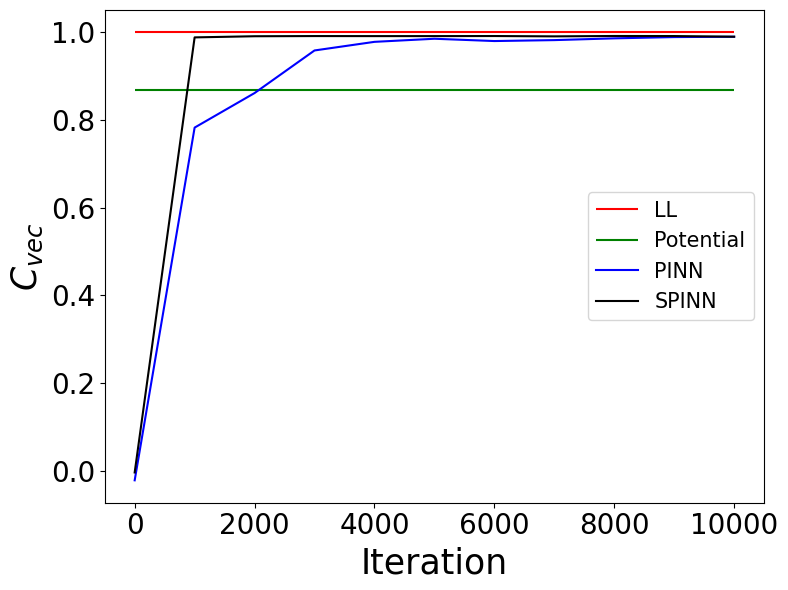

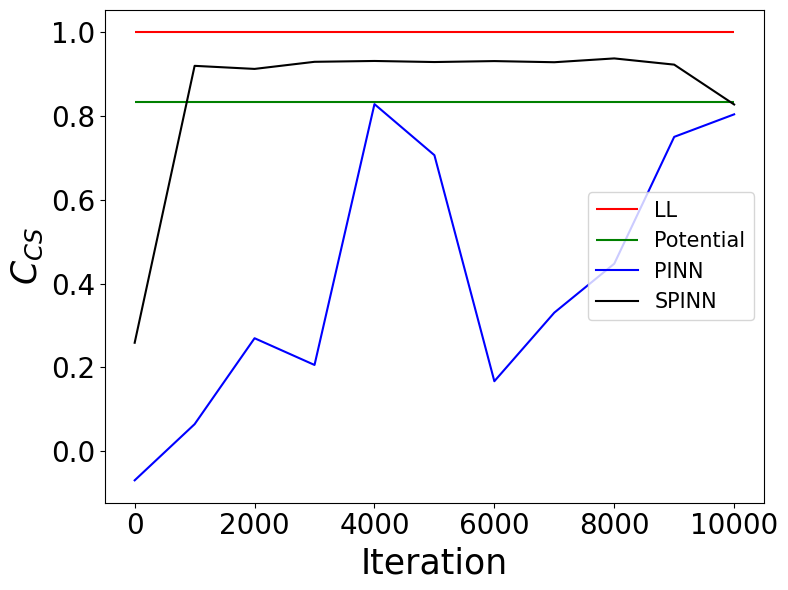

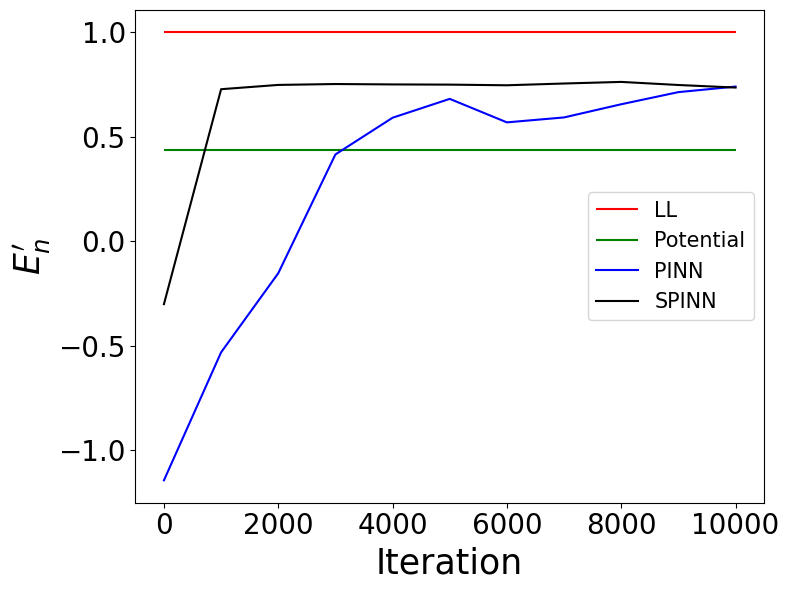

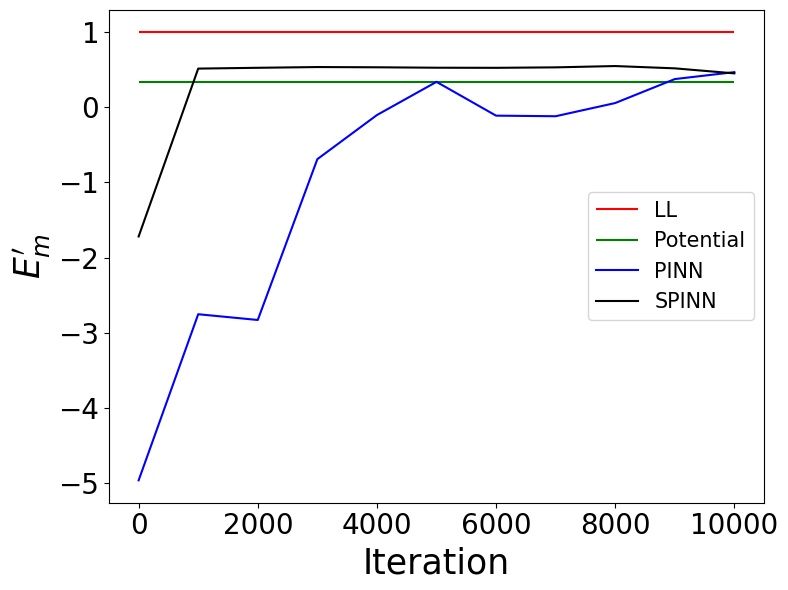

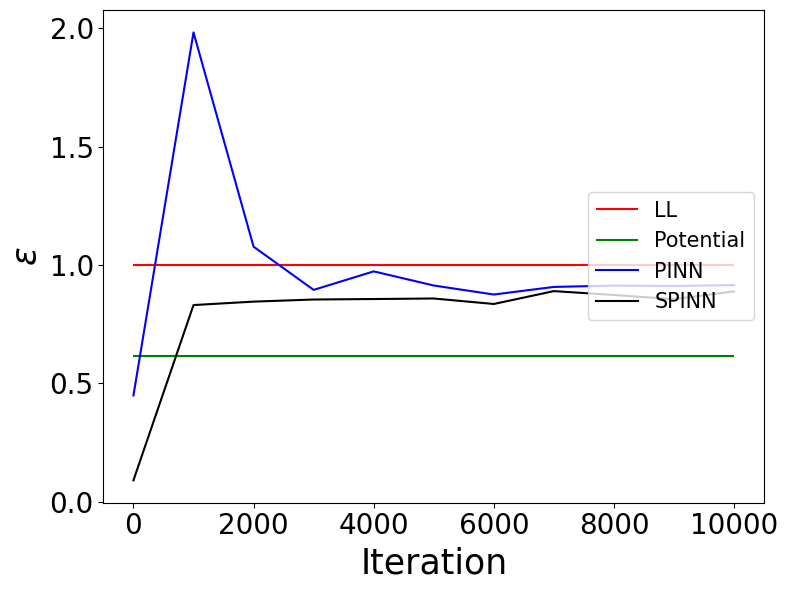

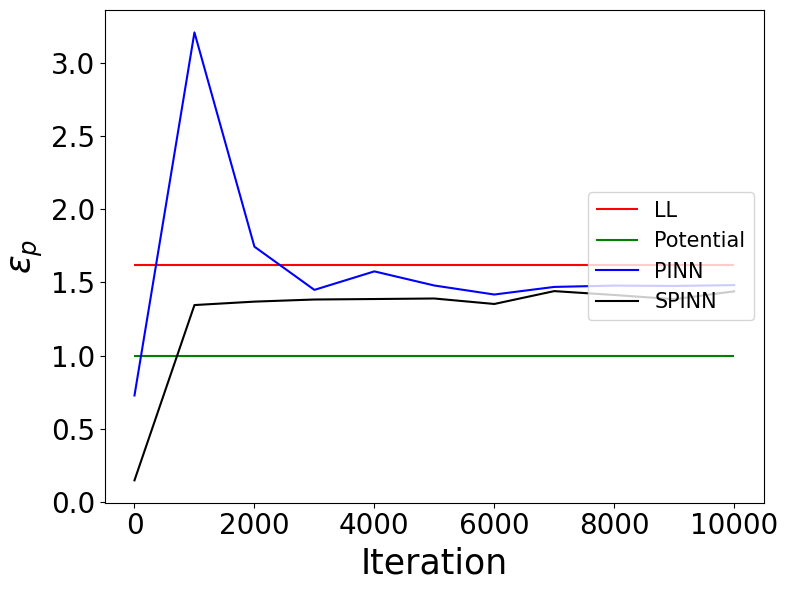

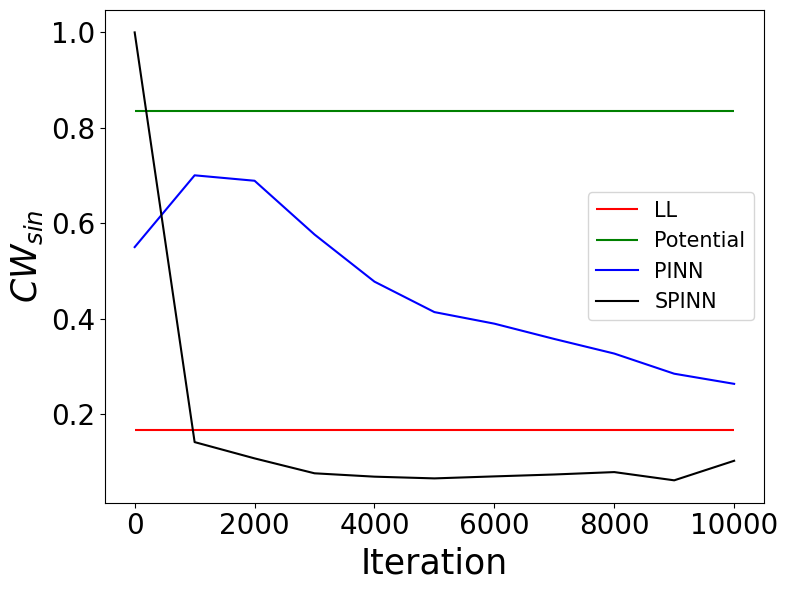

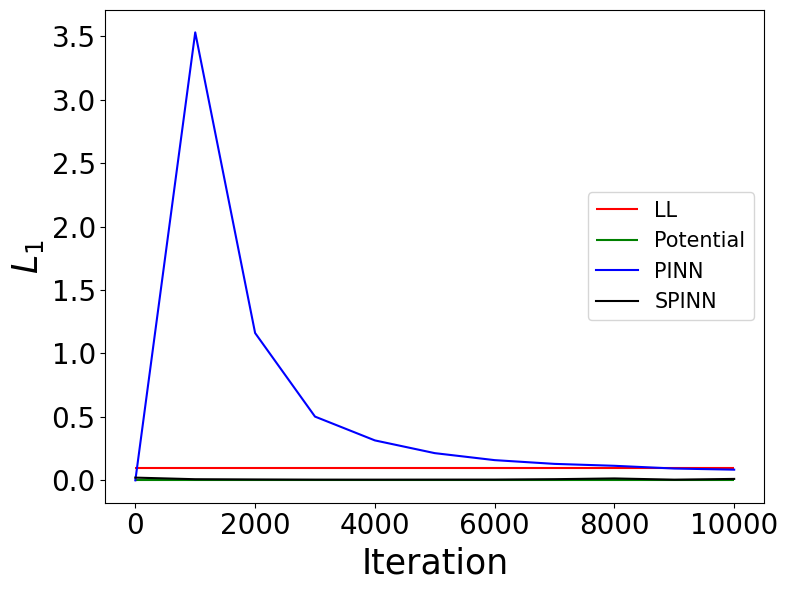

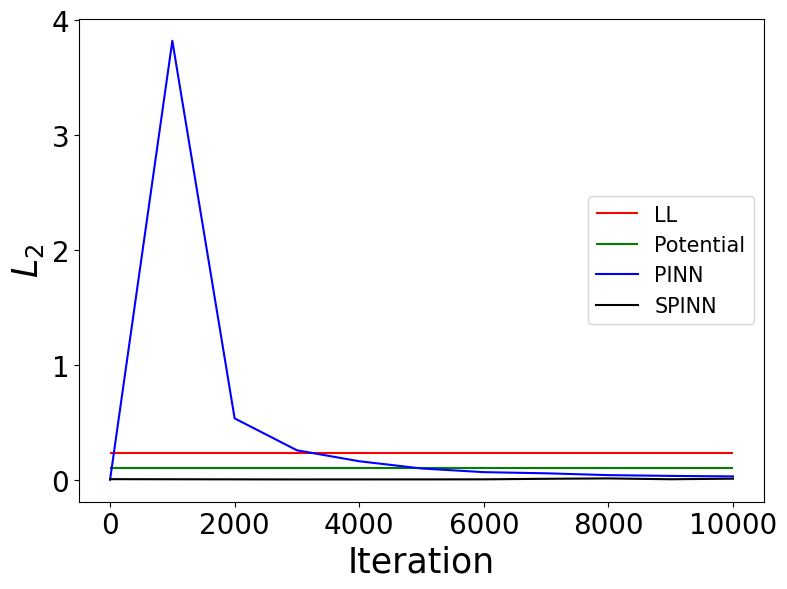

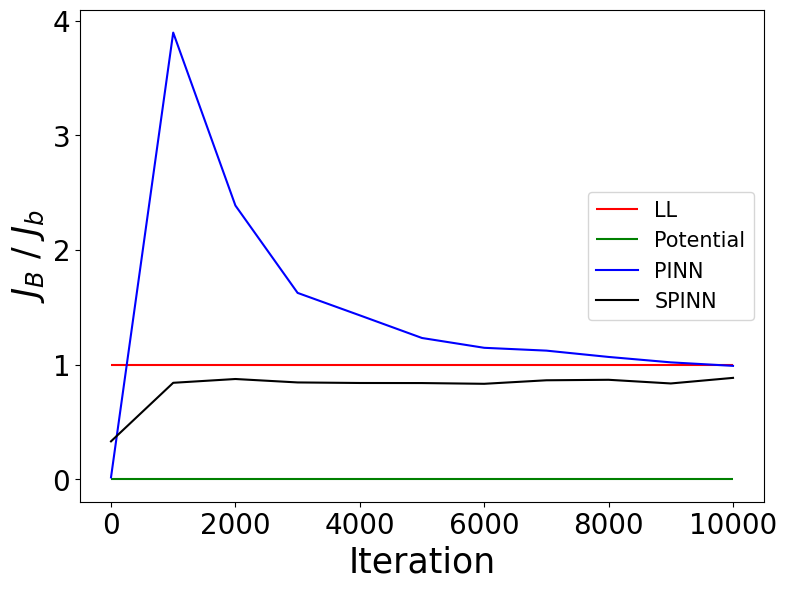

In [ ]:
plot_metric(pinn_iter, [pinn_metric, spinn_metric])

In [ ]:
pinn_loss_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/PINN/losses.npy'
pinn_loss_no_weight_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/PINN/losses_no_weight.npy'
spinn_loss_path = '/userhome/jeon_mg/workspace/_data/lowlou_64_64_64/SPINN/losses.npy'

In [ ]:
with open(pinn_loss_path, "rb") as f:
    pinn_losses = np.load(f)

with open(pinn_loss_no_weight_path, "rb") as f:
    pinn_no_weight_losses = np.load(f)

with open(spinn_loss_path, "rb") as f:
    spinn_losses = np.load(f)

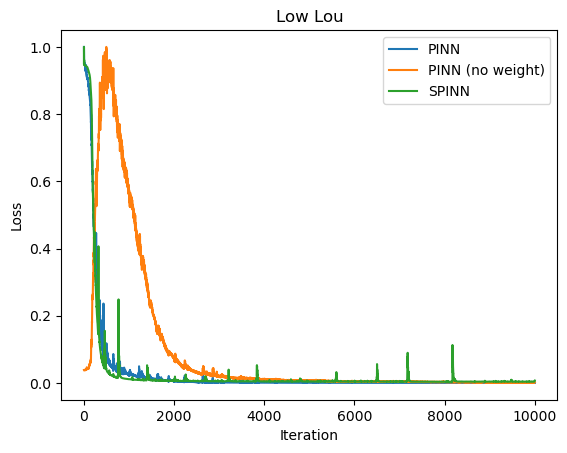

In [ ]:
plt.plot(pinn_losses/max(pinn_losses), label='PINN')
plt.plot(pinn_no_weight_losses/max(pinn_no_weight_losses), label='PINN (no weight)')
plt.plot(spinn_losses/max(spinn_losses), label='SPINN')
plt.legend()
plt.title('Low Lou')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()